# Import

In [1]:
import sys

sys.path.append(".")
sys.path.append("..")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


TRAIN_DATA = '../data/train.csv'
VAL_DATA = '../data/val.csv'
TEST_DATA = '../data/test.csv'

sns.set_style("whitegrid", {'grid.linestyle': '--'})

# Classe distribution

In [2]:
# Load data
DF_TRAIN = pd.read_csv(TRAIN_DATA)
DF_VAL = pd.read_csv(VAL_DATA)
DF_TEST = pd.read_csv(TEST_DATA)

DISEASES = [
    'Asthma',
    'Cataract',
    'Diabetes',
    'GERD',
    'Hay-fever & Eczema',
    'Major depression',
    'Myocardial infarction',
    'Osteoarthritis',
    'Pneumonia',
    'Stroke'
]

In [19]:
print(f"Training samples: {len(DF_TRAIN)}")
print(f"Validation samples: {len(DF_VAL)}")
print(f"Test samples: {len(DF_TEST)}")

Training samples: 284978
Validation samples: 10000
Test samples: 10000


In [20]:
# Calculating percentage case/control distribution
train_case_count = DF_TRAIN[DISEASES].sum()
val_case_count = DF_VAL[DISEASES].sum()
test_case_count = DF_TEST[DISEASES].sum()

train_control_count= len(DF_TRAIN) - train_case_count
val_control_count = len(DF_VAL) - val_case_count
test_control_count = len(DF_TEST) - test_case_count

train_case_percentage = (train_case_count / DF_TRAIN.shape[0]) * 100
train_control_percentage = (train_control_count / DF_TRAIN.shape[0]) * 100

val_case_percentage = (val_case_count / DF_VAL.shape[0]) * 100
val_control_percentage = (val_control_count / DF_VAL.shape[0]) * 100

test_case_percentage = (test_case_count / DF_TEST.shape[0]) * 100
test_control_percentage = (test_control_count / DF_TEST.shape[0]) * 100

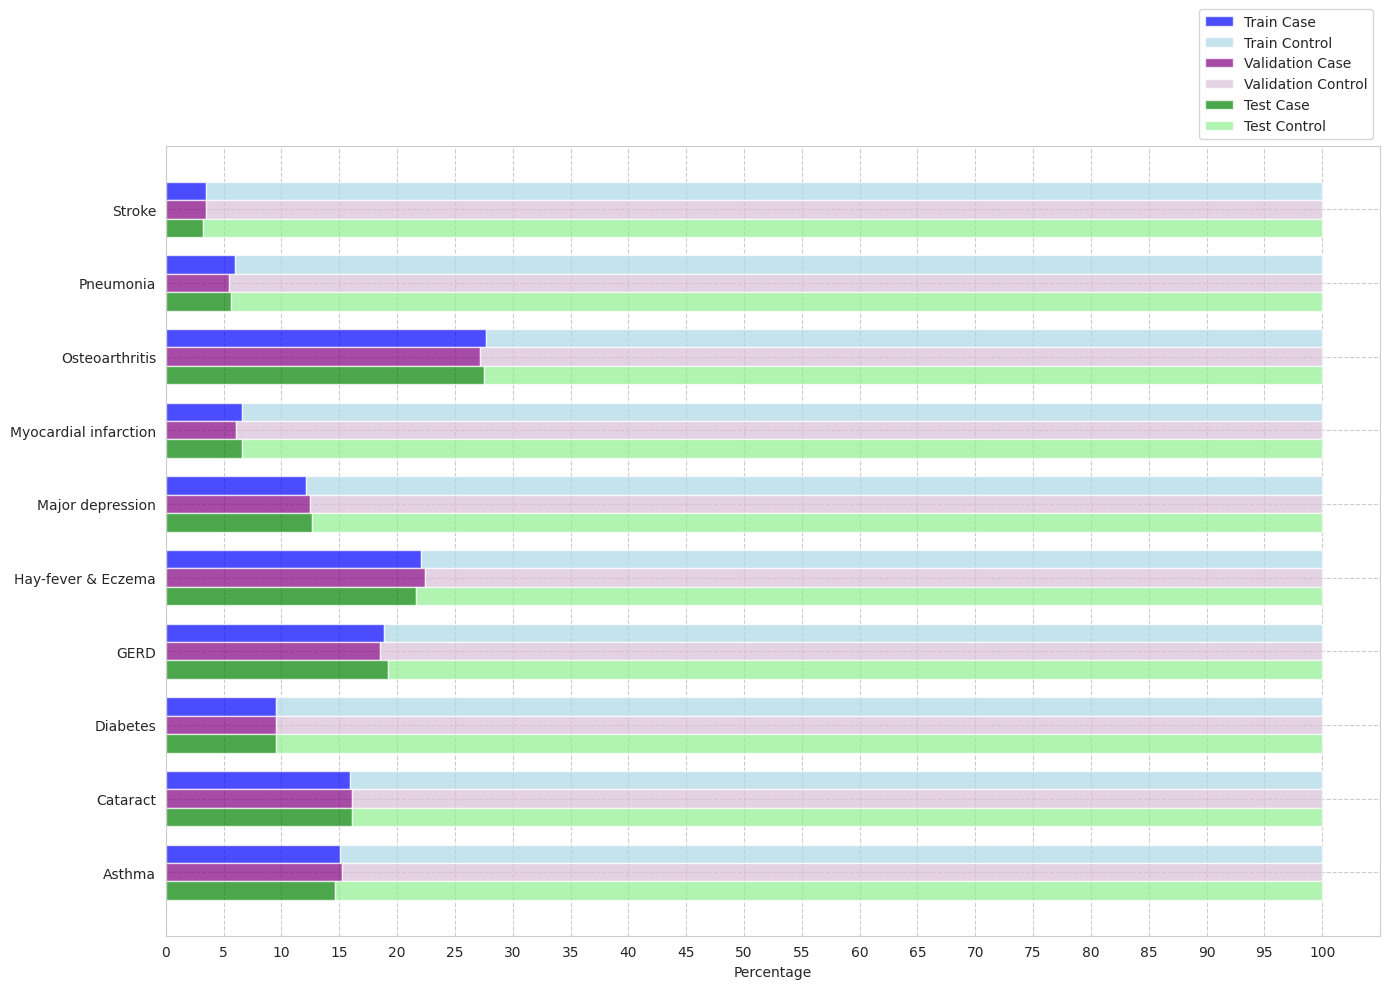

In [27]:
# Creating the bar plot with train, validation, and test datasets side by side
fig, ax = plt.subplots(figsize=(14, 10))
width = 0.25  # Width of the bars
indices = range(len(train_case_percentage))

# Plotting the case/control distribution for the train dataset
train_bars_case = ax.barh([i + width for i in indices], train_case_percentage, width, label='Train Case', color='blue', alpha=0.7)
train_bars_control = ax.barh([i + width  for i in indices], train_control_percentage, width, left=train_case_percentage, label='Train Control', color='lightblue', alpha=0.7)

# Plotting the case/control distribution for the validation dataset
val_bars_case = ax.barh([i for i in indices], val_case_percentage, width, label='Validation Case', color='purple', alpha=0.7)
val_bars_control = ax.barh([i for i in indices], val_control_percentage, width, left=val_case_percentage, label='Validation Control', color='thistle', alpha=0.7)

# Plotting the case/control distribution for the test dataset
test_bars_case = ax.barh([i - width for i in indices], test_case_percentage, width, label='Test Case', color='green', alpha=0.7)
test_bars_control = ax.barh([i - width for i in indices], test_control_percentage, width, left=test_case_percentage, label='Test Control', color='lightgreen', alpha=0.7)

# Adding labels and title
ax.set_xlabel('Percentage')
ax.set_yticks([i for i in indices])
ax.set_yticklabels(train_case_percentage.index)

# Adding the legend
ax.legend(loc='lower right', bbox_to_anchor=(1, 1))

# Setting xticks to every 5 percentage
ax.set_xticks(range(0, 101, 5))

# Adjusting the plot layout
plt.tight_layout()

# Show the plot
plt.show()